In [147]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 이미지 불러오기  (-1 : 이미지 그대로 불러오기, 0 : 흑백으로 불러오기, 1 : 알파 채널 무시한 컬러 이미지 불러오기)
src = cv2.imread('./Data/Example Student ID Card7.jpg', -1)

# 모니터 화면크기보다 이미지가 커서 짤리는 현상이 발생해 가로 세로 비율 반 반으로 사이즈 줄임
src = cv2.resize(src, (0, 0), fx=0.5, fy=0.5)

# 나중에 Contours를 그릴 원본의 복사본 생성
dst = src.copy()

# resize된 이미지의 크기를 확인해보기 위해 사용 src.shape(h, w, c), x2하면 원본 크기 알 수 있음
print(src.shape)

if src is None:
    print('Image load failed!')
    sys.exit()

# 이미지 출력 - 원본 컬러 이미지 그대로 출력
cv2.imshow('src', src)
cv2.waitKey(0)
cv2.destroyAllWindows()

(693, 520, 3)


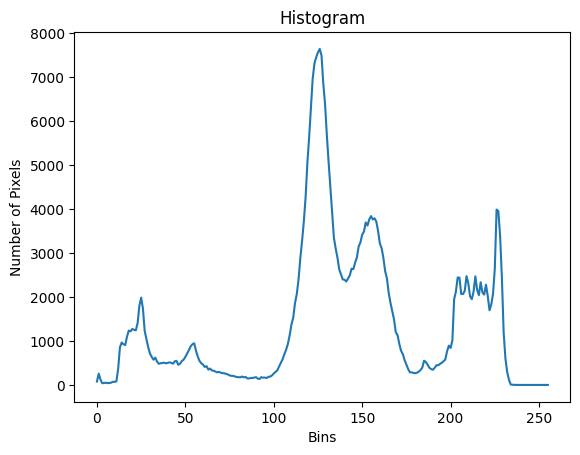

In [157]:
# 흑백으롭 변경
# 더 간단하게 이미지를 인식하기 위해 채널을 1로 변경
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 히스토그램 계산
# 흑백 이미지의 채널에 따른 픽셀수의 히스토그램을 시각화시켜 확인해보고 싶어서 실행
hist = cv2.calcHist([src_gray], [0], None, [256], [0, 256])

# 히스토그램 그래프 시각화
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Bins')  # 명암 값
plt.ylabel('Number of Pixels')   # 픽셀 수
plt.show()

# 흑백 이미지 출력
cv2.imshow('src_gray', src_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [158]:
# 가우시안 블러 적용 / 노이즈 제거를 위해
# 이미지의 색수차를 줄여 색상간의 경계선을 흐릿하게 만들어 이미지를 부드럽게 만들어 노이즈 제거하기 위함
# 단, 이 때 가우시안 블러를 많이 적용할 수록 흐릿해짐
src_blurred = cv2.GaussianBlur(src_gray, ksize=(7, 7), sigmaX=0)

# 가우시안 블러 처리 된 이미지 출력
cv2.imshow('src_blurred', src_blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [159]:
# 흑백이미지와 가우시안블러 처리 된 이미지를 각각 이진화
# 블러 처리의 유무, 즉 노이즈 제거의 유무에 따른 이진화 이미지 차이를 관찰하기 위함
# 블러처리가 되지 않은 흑백이미지의 이진화 이미지
ret, src_thresh_gray = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU )


# 가우시안 블러 처리 된 이미지를 이진화
ret, src_thresh_blur = cv2.threshold(src_blurred, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU )

# 가우시안 블러 처리 된 이미지의 이진화 이미지 출력
cv2.imshow('src_thresh_gray', src_thresh_gray)
cv2.imshow('src_thresh_blur', src_thresh_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [160]:
'''
# 수직투사와 수평투사로 각각 y축, x축에 대한 픽셀값들의 히스토그램을 시각화
# 학생증의 대략적인 위치를 잡기 위함.

# 블러처린 된 후의 이미지의 axis = 0, 즉 x축의 0 ~ 255까지의 모든 픽셀 값들을 더함.
vertical_projection_blur = np.sum(src_thresh, axis=0)

# 수직 투사 결과 확인
print("수직 투사 결과:", vertical_projection)

# 블러처린 된 후의 이미지의 axis = 1, 즉 y축의 0 ~ 255까지의 모든 픽셀 값들을 더함.
horizontal_projection = np.sum(src_thresh, axis=1)

# 수평 투사 결과 확인
print("수평 투사 결과:", horizontal_projection)
'''

'\n# 수직투사와 수평투사로 각각 y축, x축에 대한 픽셀값들의 히스토그램을 시각화\n# 학생증의 대략적인 위치를 잡기 위함.\n\n# 블러처린 된 후의 이미지의 axis = 0, 즉 x축의 0 ~ 255까지의 모든 픽셀 값들을 더함.\nvertical_projection_blur = np.sum(src_thresh, axis=0)\n\n# 수직 투사 결과 확인\nprint("수직 투사 결과:", vertical_projection)\n\n# 블러처린 된 후의 이미지의 axis = 1, 즉 y축의 0 ~ 255까지의 모든 픽셀 값들을 더함.\nhorizontal_projection = np.sum(src_thresh, axis=1)\n\n# 수평 투사 결과 확인\nprint("수평 투사 결과:", horizontal_projection)\n'

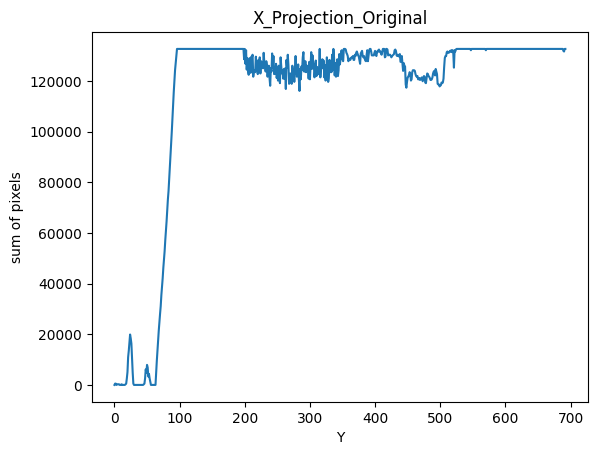

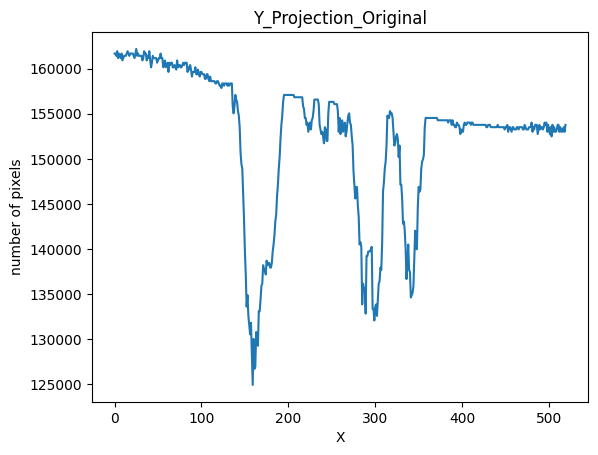

In [161]:
## 수직투사와 수평투사로 각각 y축, x축에 대한 픽셀값들의 히스토그램을 시각화
# 학생증의 대략적인 위치를 잡기 위함.

# 1. 일반적인 흑백이미지를 이진화 한 이미지 사용.
# 다른 작업 없이 흑백 이미지를 이진화 한 후 이미지의 x축, y축 각각에 대한 픽셀값들의 히스토그램

# X축 프로젝션 (행별 합계)
# X축 (1 ~ 255)의 인덱스 1 부터 인덱스 255까지의 각각의 인덱스의 모든 Y축의 픽셀값들의 합
x_projection_ori = np.sum(src_thresh_gray, axis=1)

# Y축 프로젝션 (열별 합계)
# Y축 (1 ~ 255)의 인덱스 1 부터 인덱스 255까지의 각각의 인덱스의 모든 X축의 픽셀값들의 합
y_projection_ori = np.sum(src_thresh_gray, axis=0)

# X축 히스토그램
plt.plot(x_projection_ori)
plt.xlabel('Y')
plt.ylabel('sum of pixels')
plt.title('X_Projection_Original')
plt.show()

# Y축 히스토그램
plt.plot(y_projection_ori)
plt.xlabel('X')
plt.ylabel('number of pixels')
plt.title('Y_Projection_Original')
plt.show()

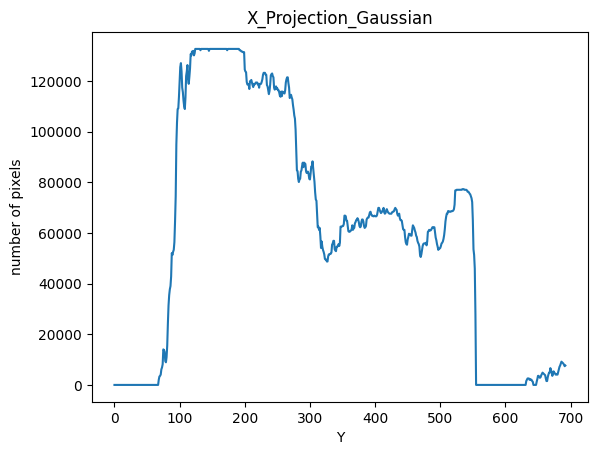

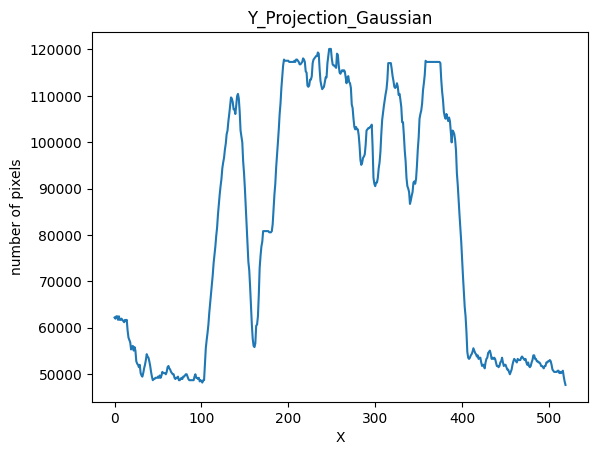

In [163]:
## 수직투사와 수평투사로 각각 y축, x축에 대한 픽셀값들의 히스토그램을 시각화
# 학생증의 대략적인 위치를 잡기 위함.

# 2. 가우시안 블러를 적용한 후 이진화 한 이미지를 사용. 
# 가우시안 블러 처리한 이진화 이미지의 x축, y축 각각에 대한 픽셀값들의 히스토그램

# X축 프로젝션 (행별 합계)
# X축 (1 ~ 255)의 인덱스 1 부터 인덱스 255까지의 각각의 인덱스의 모든 Y축의 픽셀값들의 합
x_projection_gaus = np.sum(src_thresh_blur, axis=1)

# Y축 프로젝션 (열별 합계)
# Y축 (1 ~ 255)의 인덱스 1 부터 인덱스 255까지의 각각의 인덱스의 모든 X축의 픽셀값들의 합
y_projection_gaus = np.sum(src_thresh_blur, axis=0)

# X축 히스토그램
plt.plot(x_projection_gaus)
plt.xlabel('Y')
plt.ylabel('number of pixels')
plt.title('X_Projection_Gaussian')
plt.show()

# Y축 히스토그램
plt.plot(y_projection_gaus)
plt.xlabel('X')
plt.ylabel('number of pixels')
plt.title('Y_Projection_Gaussian')
plt.show()

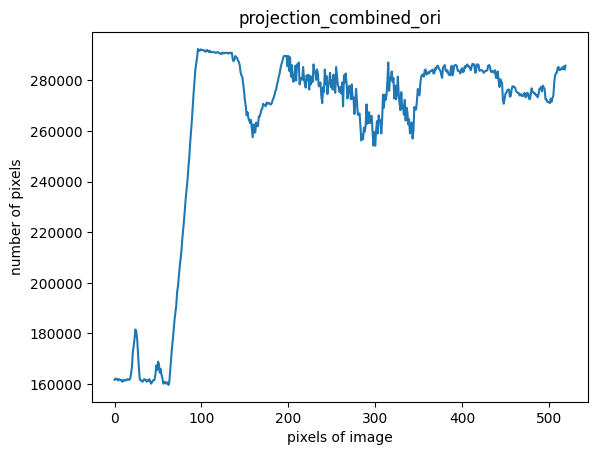

In [226]:
# 학생증의 대략적인 위치를 잘라내기 위해선 x축 프로젝션 값과 y축 프로젝션 값의 공통 부분을 찾아서 잘라내야 된다고 생각함.
# 따라서 x축 프로젝션과 y축 프로젝션을 더해 공통된 부분만 추출했을 때의 결과 값을 이용할 수 있지 않을까 생각함.

# x축, y축에 대한 프로젝션 결과를 합치기 위해서 배열의 크기를 동일하게 만들어야함.
# 배열의 크기 맞추기
min_size = min(len(x_projection_ori), len(y_projection_ori))
x_projection_ori = x_projection_ori[:min_size]
y_projection_ori = y_projection_ori[:min_size]
projection_combined_ori = x_projection_ori + y_projection_ori

plt.plot(projection_combined_ori)
plt.xlabel('pixels of image')
plt.ylabel('number of pixels')
plt.title('projection_combined_ori')
plt.show()

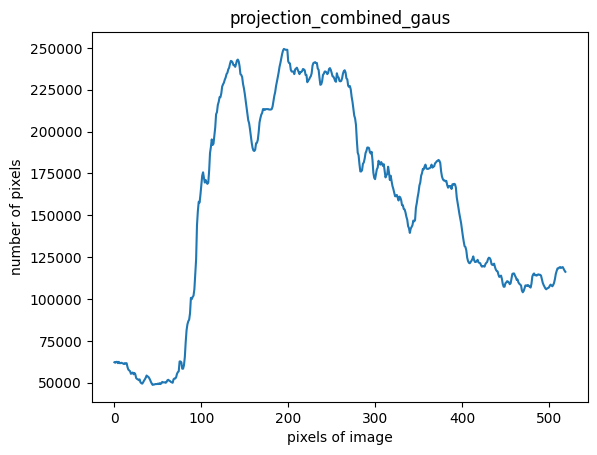

In [164]:
# 학생증의 대략적인 위치를 잘라내기 위해선 x축 프로젝션 값과 y축 프로젝션 값의 공통 부분을 찾아서 잘라내야 된다고 생각함.
# 따라서 x축 프로젝션과 y축 프로젝션을 더해 공통된 부분만 추출했을 때의 결과 값을 이용할 수 있지 않을까 생각함.

# x축, y축에 대한 프로젝션 결과를 합치기 위해서 배열의 크기를 동일하게 만들어야함.
# 배열의 크기 맞추기
min_size = min(len(x_projection_gaus), len(y_projection_gaus))
x_projection_gaus = x_projection_gaus[:min_size]
y_projection_gaus = y_projection_gaus[:min_size]
projection_combined_gaus = x_projection_gaus + y_projection_gaus

plt.plot(projection_combined_gaus)
plt.xlabel('pixels of image')
plt.ylabel('number of pixels')
plt.title('projection_combined_gaus')
plt.show()

In [231]:
# 픽셀값이 n개 이상인 영역을 잘라내보기
# 대략적으로 학생증을 잘라내기 위함.

# 각각의 결과값이 궁금해 1번, 2번, 3번 3가지 경우로 나누어 결과값 비교해봄
# 가우시안 블러 x 이미지 사용.
# 1번. x축과 y축의 프로젝션 값을 합한 combined를 이용해서 범위 잘라내기
# 2번. x축 프로젝션 값을 이용해 범위 잘라내기
# 3번. y축 프로젝션 값을 이용해 범위 잘라내기

# 1. x축과 y축의 프로젝션 값을 합한 combined으로 계산

# 픽셀값이 n개 이상인 영역 식별
n = 286000 # n개 이상의 픽셀값을 가진 영역 식별
indices = np.where(projection_combined_ori >= n)[0]
# start = 픽셀 값이 n개 이상인 영역의 첫 인덱스
# end = 픽셀 값이 n개 이상인 영역의 마지막 인덱스
# 픽셀값이 n개 이상인 범위를 잘라내기 위해 start값과 end값 구함
start = indices[0]
end = indices[-1]

# 역투영 생성
Backprojection_img_comb_ori = np.zeros_like(src_gray)
Backprojection_img_comb_ori[:, start:end] = src_gray[:, start:end]

cv2.imshow('Original Image', src_gray)
cv2.imshow('Backprojection_img_comb_ori', Backprojection_img_comb_ori)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [237]:
# 픽셀값이 n개 이상인 영역을 잘라내보기
# 대략적으로 학생증을 잘라내기 위함.

# 2. x축의 프로젝션 값으로 계산

# 픽셀값이 n개 이상인 영역 식별
n = 130000  # n개 이상의 픽셀값을 가진 영역 식별
indices = np.where(x_projection_ori >= n)[0]
# start = 픽셀 값이 n개 이상인 영역의 첫 인덱스
# end = 픽셀 값이 n개 이상인 영역의 마지막 인덱스
# 픽셀값이 n개 이상인 범위를 잘라내기 위해 start값과 end값 구함
start = indices[0]
end = indices[-1]

# 역투영 생성
Backprojection_img_ori_x = np.zeros_like(src_gray)
Backprojection_img_ori_x[:, start:end] = src_gray[:, start:end]

cv2.imshow('Original Image', src_gray)
cv2.imshow('Backprojection_img_ori_x', Backprojection_img_ori_x)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [238]:
# 픽셀값이 n개 이상인 영역을 잘라내보기
# 대략적으로 학생증을 잘라내기 위함.

# 3. y축의 프로젝션 값으로 계산

# 픽셀값이 n개 이상인 영역 식별
n = 155000  # n개 이상의 픽셀값을 가진 영역 식별
indices = np.where(y_projection_ori >= n)[0]
# start = 픽셀 값이 n개 이상인 영역의 첫 인덱스
# end = 픽셀 값이 n개 이상인 영역의 마지막 인덱스
# 픽셀값이 n개 이상인 범위를 잘라내기 위해 start값과 end값 구함
start = indices[0]
end = indices[-1]

# 역투영 생성
Backprojection_img_ori_y = np.zeros_like(src_gray)
Backprojection_img_ori_y[:, start:end] = src_gray[:, start:end]

cv2.imshow('Original Image', src_gray)
cv2.imshow('Backprojection_img_ori_y', Backprojection_img_ori_y)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [242]:
# 픽셀값이 n개 이상인 영역을 잘라내보기
# 대략적으로 학생증을 잘라내기 위함.

# 각각의 결과값이 궁금해 1번, 2번, 3번 3가지 경우로 나누어 결과값 비교해봄
# 가우시안 블러 o 이미지 사용.
# 1번. x축과 y축의 프로젝션 값을 합한 combined를 이용해서 범위 잘라내기
# 2번. x축 프로젝션 값을 이용해 범위 잘라내기
# 3번. y축 프로젝션 값을 이용해 범위 잘라내기

# 1. x축과 y축의 프로젝션 값을 합한 combined으로 계산

# 픽셀값이 n개 이상인 영역 식별
n = 150000  # n개 이상의 픽셀값을 가진 영역 식별
indices = np.where(projection_combined_gaus >= n)[0]
# start = 픽셀 값이 n개 이상인 영역의 첫 인덱스
# end = 픽셀 값이 n개 이상인 영역의 마지막 인덱스
# 픽셀값이 n개 이상인 범위를 잘라내기 위해 start값과 end값 구함
start = indices[0]
end = indices[-1]

# 역투영 생성
Backprojection_img_comb_gaus = np.zeros_like(src_gray)
Backprojection_img_comb_gaus[:, start:end] = src_gray[:, start:end]

cv2.imshow('Original Image', src_gray)
cv2.imshow('Backprojection_img_comb_gaus', Backprojection_img_comb_gaus)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [240]:
# 픽셀값이 n개 이상인 영역을 잘라내보기
# 대략적으로 학생증을 잘라내기 위함.

# 2. x축의 프로젝션 값으로 계산

# 픽셀값이 n개 이상인 영역 식별
n = 65000  # n개 이상의 픽셀값을 가진 영역 식별
indices = np.where(x_projection_gaus >= n)[0]
# start = 픽셀 값이 n개 이상인 영역의 첫 인덱스
# end = 픽셀 값이 n개 이상인 영역의 마지막 인덱스
# 픽셀값이 n개 이상인 범위를 잘라내기 위해 start값과 end값 구함
start = indices[0]
end = indices[-1]

# 역투영 생성
Backprojection_img_gaus_x = np.zeros_like(src_gray)
Backprojection_img_gaus_x[:, start:end] = src_gray[:, start:end]

cv2.imshow('Original Image', src_gray)
cv2.imshow('Backprojection_img_gaus_x', Backprojection_img_gaus_x)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [241]:
# 픽셀값이 n개 이상인 영역을 잘라내보기
# 대략적으로 학생증을 잘라내기 위함.

# 3. y축의 프로젝션 값으로 계산

# 픽셀값이 n개 이상인 영역 식별
n = 80000  # n개 이상의 픽셀값을 가진 영역 식별
indices = np.where(y_projection_gaus >= n)[0]
# start = 픽셀 값이 n개 이상인 영역의 첫 인덱스
# end = 픽셀 값이 n개 이상인 영역의 마지막 인덱스
# 픽셀값이 n개 이상인 범위를 잘라내기 위해 start값과 end값 구함
start = indices[0]
end = indices[-1]

# 역투영 생성
Backprojection_img_gaus_y = np.zeros_like(src_gray)
Backprojection_img_gaus_y[:, start:end] = src_gray[:, start:end]

cv2.imshow('Original Image', src_gray)
cv2.imshow('Backprojection_img_gaus_y', Backprojection_img_gaus_y)
cv2.waitKey(0)
cv2.destroyAllWindows()